In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_faults.csv')

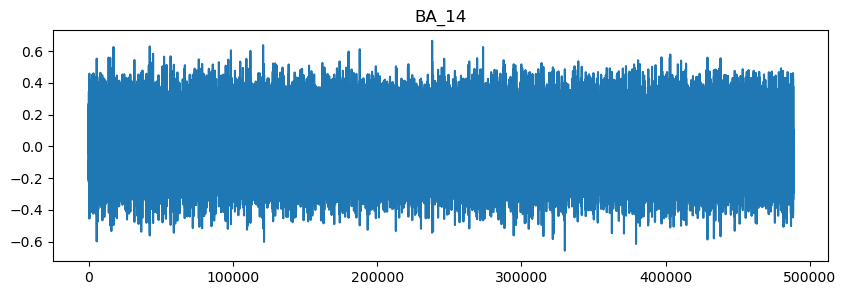

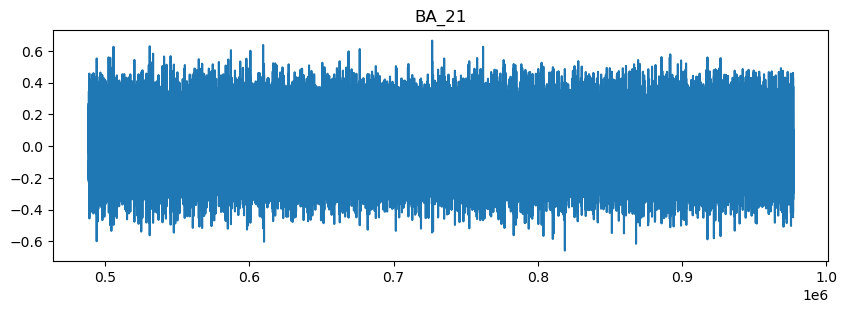

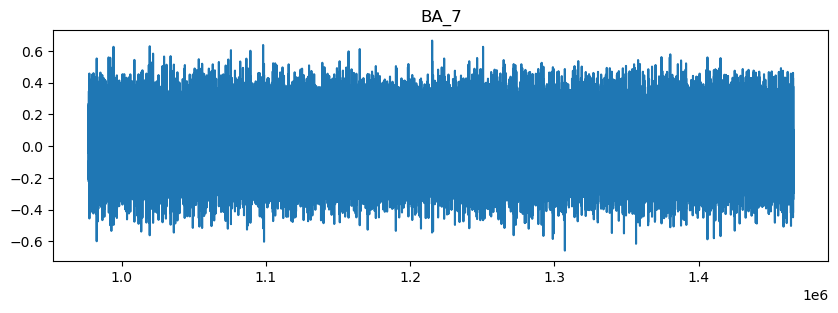

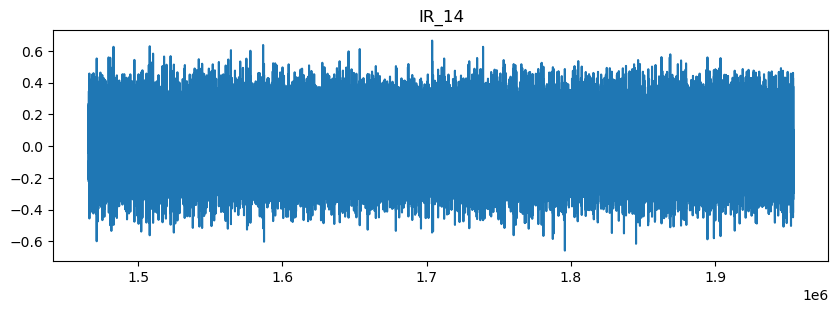

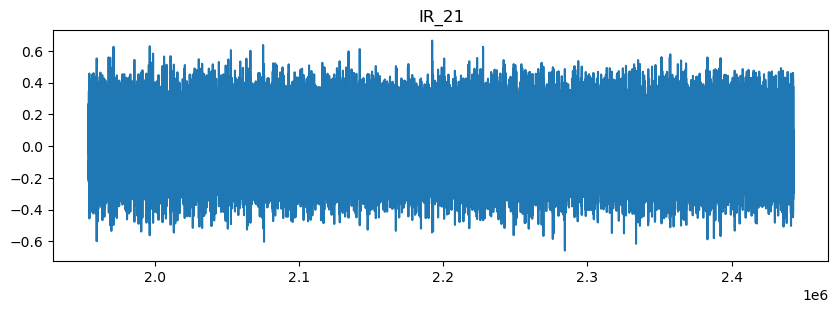

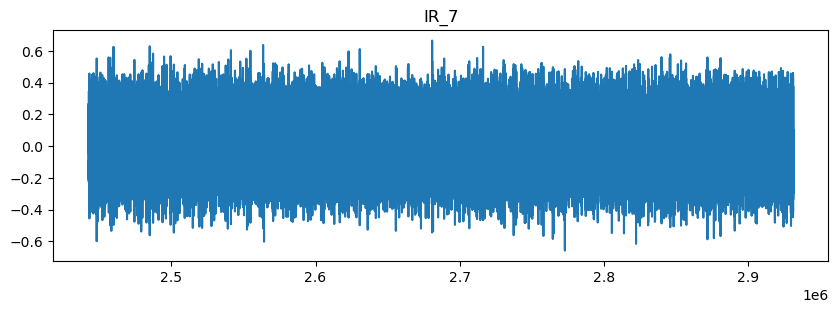

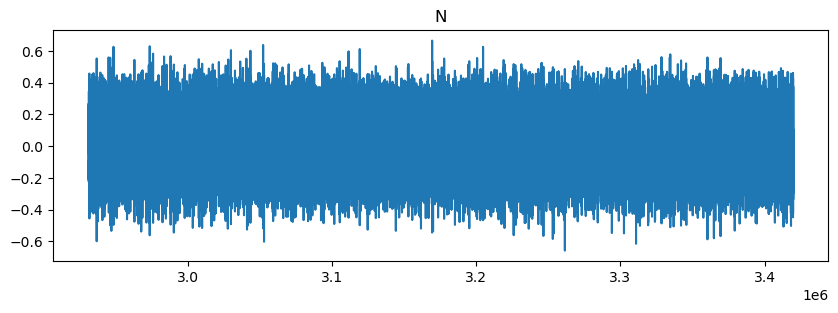

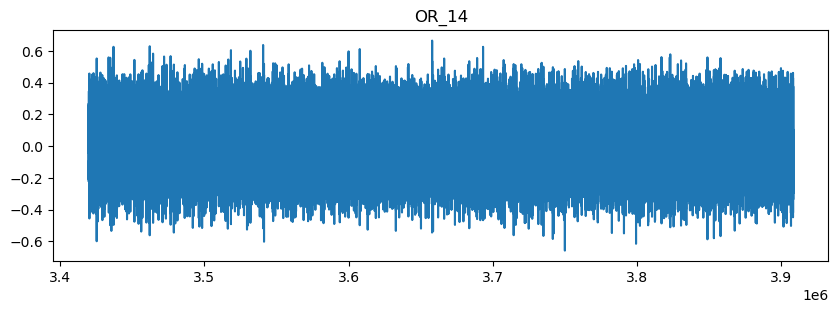

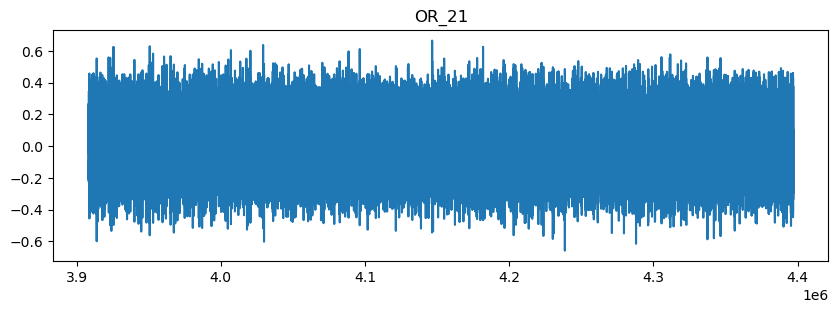

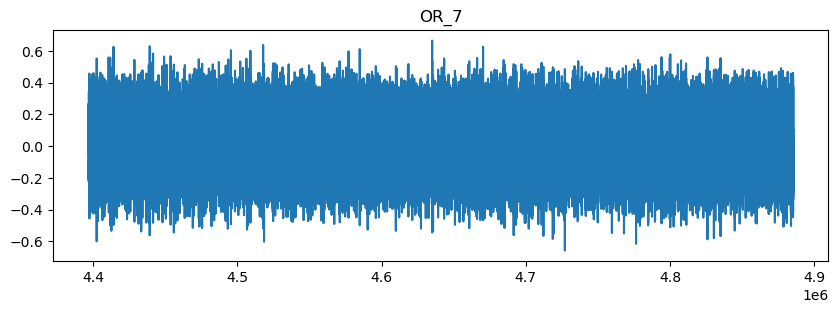

In [3]:
faults = df['fault'].unique()
for f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)

In [4]:
df = pd.read_csv('all_faults.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len = 4096
stride = 100

X=[]
Y=[]

for k in df['fault'].unique():
    df_temp_2 = df[df['fault']==k]
    
    #created an array of starting indices for window length from dataframe df
    indices = np.arange(0,len(df_temp_2)-win_len,stride)
    #used the random and shuffle methods to randomize the selection of starting index
    np.random.shuffle(indices)
    
    for i in indices:
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
        
#numpy array for values
X = np.array(X)
X = X.reshape((X.shape[0],64,64,1))

Y = np.array(Y)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

print(X.shape)

(48450, 64, 64, 1)


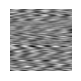

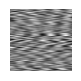

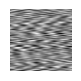

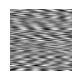

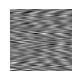

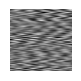

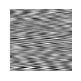

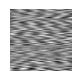

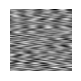

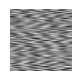

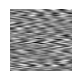

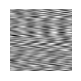

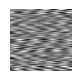

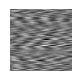

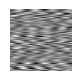

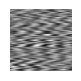

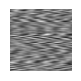

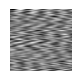

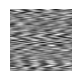

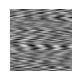

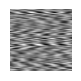

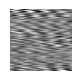

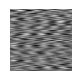

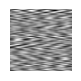

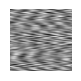

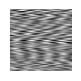

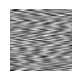

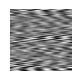

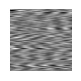

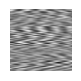

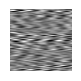

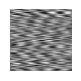

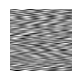

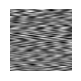

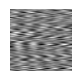

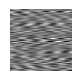

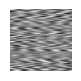

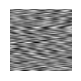

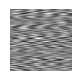

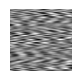

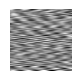

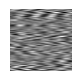

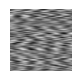

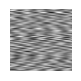

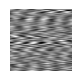

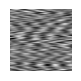

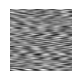

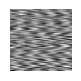

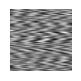

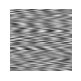

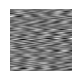

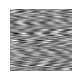

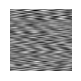

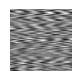

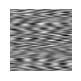

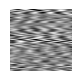

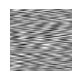

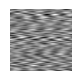

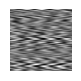

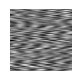

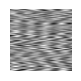

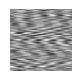

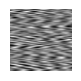

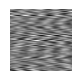

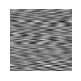

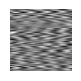

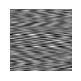

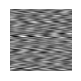

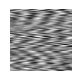

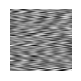

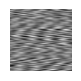

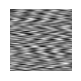

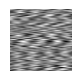

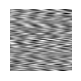

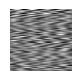

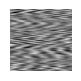

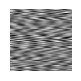

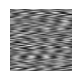

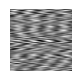

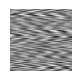

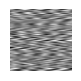

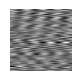

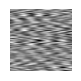

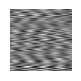

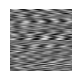

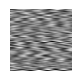

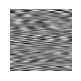

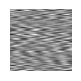

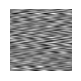

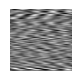

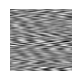

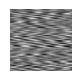

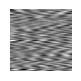

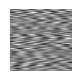

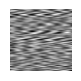

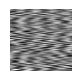

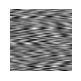

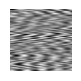

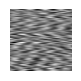

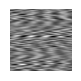

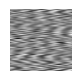

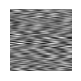

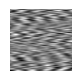

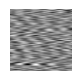

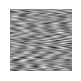

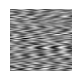

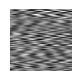

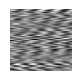

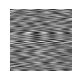

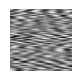

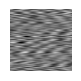

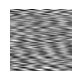

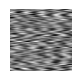

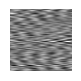

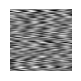

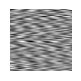

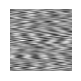

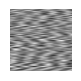

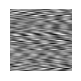

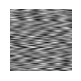

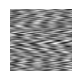

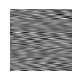

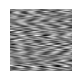

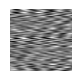

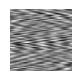

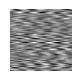

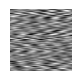

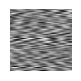

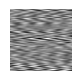

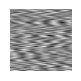

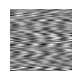

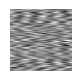

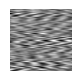

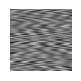

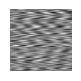

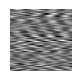

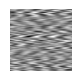

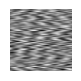

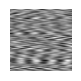

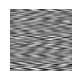

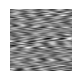

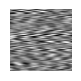

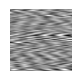

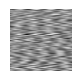

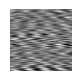

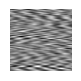

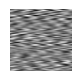

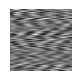

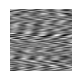

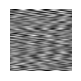

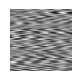

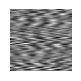

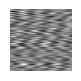

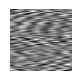

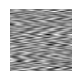

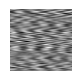

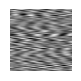

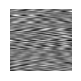

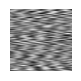

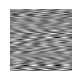

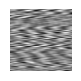

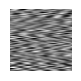

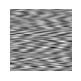

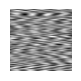

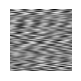

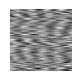

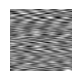

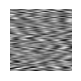

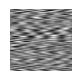

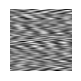

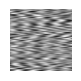

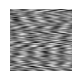

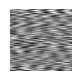

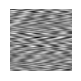

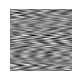

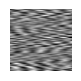

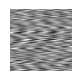

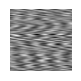

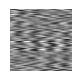

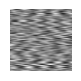

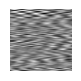

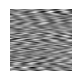

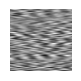

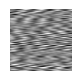

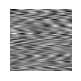

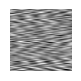

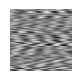

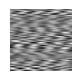

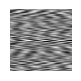

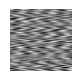

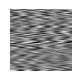

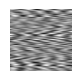

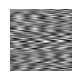

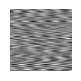

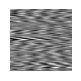

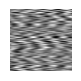

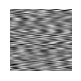

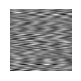

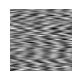

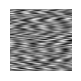

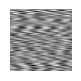

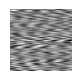

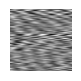

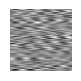

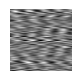

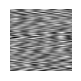

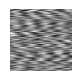

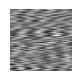

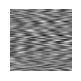

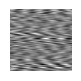

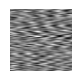

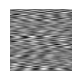

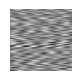

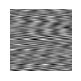

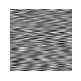

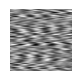

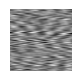

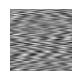

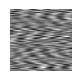

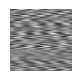

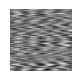

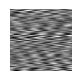

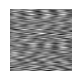

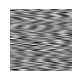

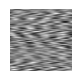

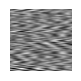

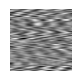

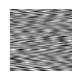

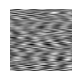

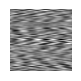

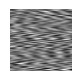

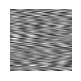

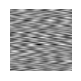

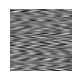

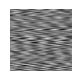

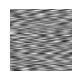

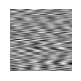

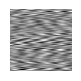

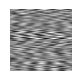

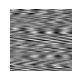

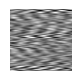

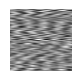

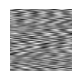

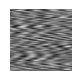

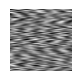

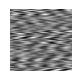

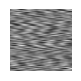

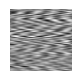

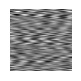

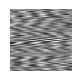

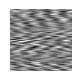

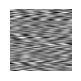

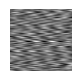

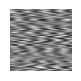

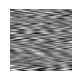

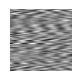

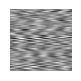

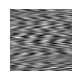

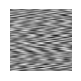

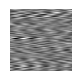

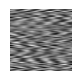

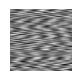

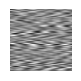

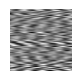

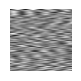

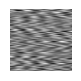

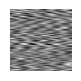

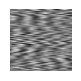

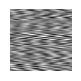

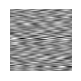

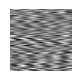

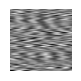

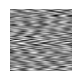

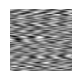

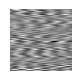

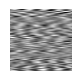

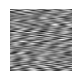

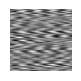

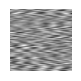

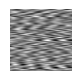

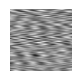

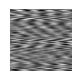

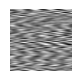

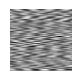

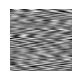

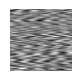

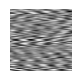

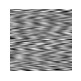

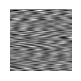

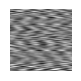

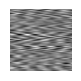

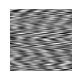

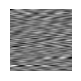

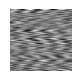

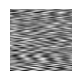

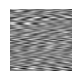

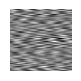

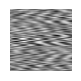

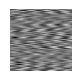

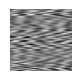

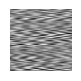

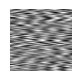

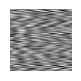

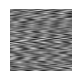

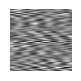

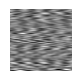

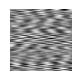

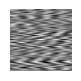

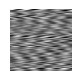

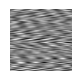

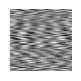

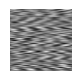

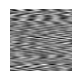

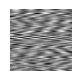

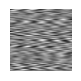

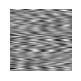

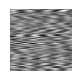

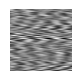

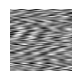

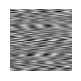

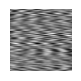

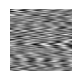

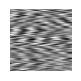

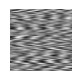

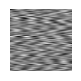

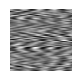

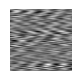

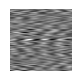

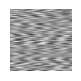

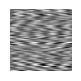

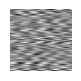

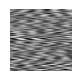

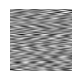

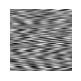

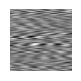

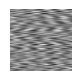

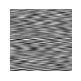

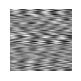

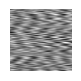

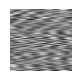

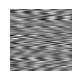

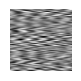

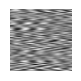

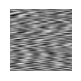

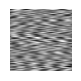

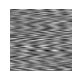

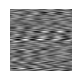

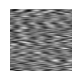

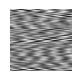

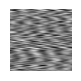

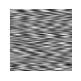

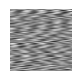

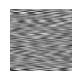

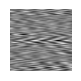

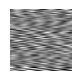

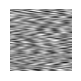

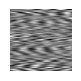

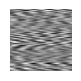

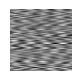

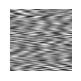

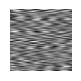

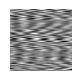

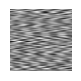

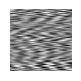

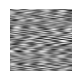

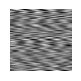

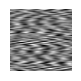

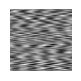

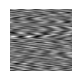

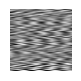

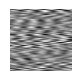

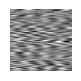

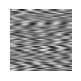

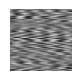

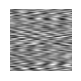

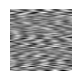

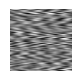

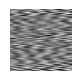

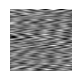

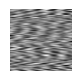

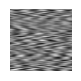

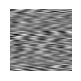

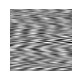

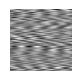

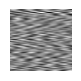

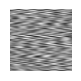

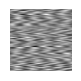

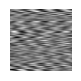

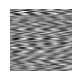

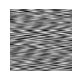

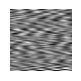

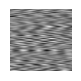

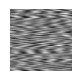

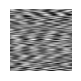

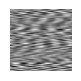

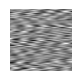

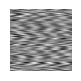

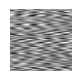

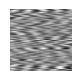

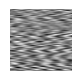

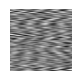

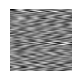

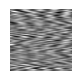

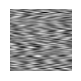

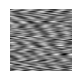

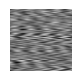

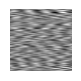

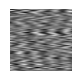

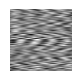

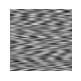

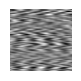

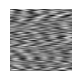

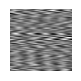

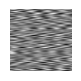

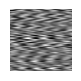

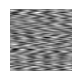

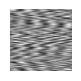

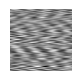

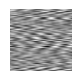

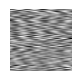

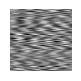

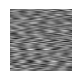

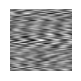

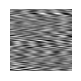

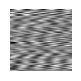

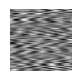

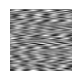

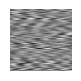

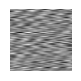

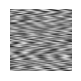

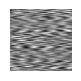

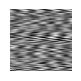

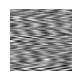

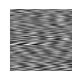

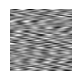

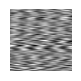

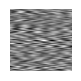

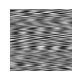

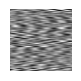

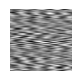

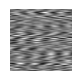

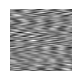

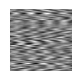

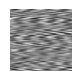

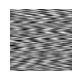

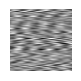

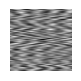

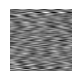

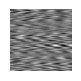

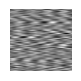

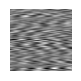

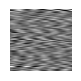

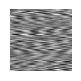

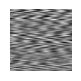

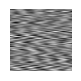

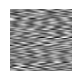

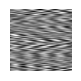

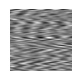

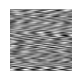

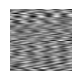

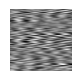

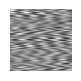

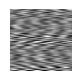

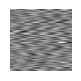

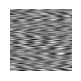

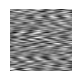

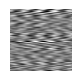

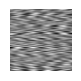

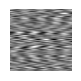

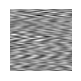

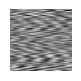

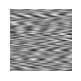

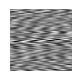

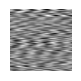

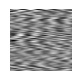

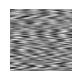

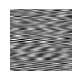

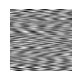

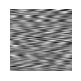

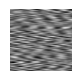

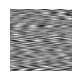

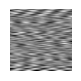

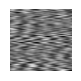

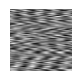

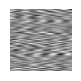

In [6]:
from matplotlib.pyplot import imsave
import os

labels = []
save_dir = 'gray_img'
os.makedirs(save_dir, exist_ok=True)

count = 1
for idx in range(0, 48450, 100):
    img = X[idx]
    np.random.shuffle(img)

    # Create a figure with 64x64 dimensions and resolution of 64 dots per inch
    fig = plt.figure(figsize=(64 / 80, 64 / 80), dpi=100)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    labels.append(Y[idx])

    save_path = os.path.join(save_dir, f'image_{count}.png')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
    
    plt.show()
    count = count + 1

In [7]:
print(count)

486


In [8]:
img_labels=[]
labelBA_14 =[]
labelBA_7 =[]
labelBA_21 =[]
labelIR_14 =[]
labelIR_7 =[]
labelIR_21 =[]
labelOR_14 =[]
labelOR_7 =[]
labelOR_21 =[]
labelN =[]

for i in range(1,len(labels)):
    if labels[i] == 'BA_14':
        labelBA_14.append(labels[i])
        continue
    elif labels[i] == 'BA_7':
        labelBA_7.append(labels[i])
        continue
    elif labels[i] == 'BA_21':
        labelBA_21.append(labels[i])
        continue
    elif labels[i] == 'IR_14':
        labelIR_14.append(labels[i])
        continue
    elif labels[i] == 'IR_7':
        labelIR_7.append(labels[i])
        continue
    elif labels[i] == 'IR_21':
        labelIR_21.append(labels[i])
        continue
    elif labels[i] == 'OR_14':
        labelOR_14.append(labels[i])
        continue
    elif labels[i] == 'OR_7':
        labelOR_7.append(labels[i])
        continue
    elif labels[i] == 'OR_21':
        labelOR_21.append(labels[i])
        continue
    elif labels[i] == 'N':
        labelN.append(labels[i])
        continue

In [9]:
img_labels.append(labelBA_14)

In [10]:
img_labels.append(labelBA_21)

In [11]:
img_labels.append(labelBA_7)

In [12]:
img_labels.append(labelIR_14)

In [13]:
img_labels.append(labelIR_21)

In [14]:
img_labels.append(labelIR_7)

In [15]:
img_labels.append(labelN)

In [16]:
img_labels.append(labelOR_14)

In [17]:
img_labels.append(labelOR_21)

In [18]:
img_labels.append(labelOR_7)

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set your dataset directory
dataset_dir = 'E:/graypics'

# Define image dimensions and batch size
img_width, img_height = 64, 64
batch_size = 32

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 345 images belonging to 10 classes.
Found 140 images belonging to 10 classes.
Epoch 1/100
11/11 [==============================] - 11s 737ms/step - loss: 2.3297 - accuracy: 0.0899 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
11/11 [==============================] - 3s 231ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/100
11/11 [==============================] - 3s 225ms/step - loss: 2.3027 - accuracy: 0.0754 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/100
11/11 [==============================] - 3s 234ms/step - loss: 2.3017 - accuracy: 0.1188 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
11/11 [==============================] - 2s 217ms/step - loss: 2.3048 - accuracy: 0.1246 - val_loss: 2.3027 - val_accuracy: 0.1071
Epoch 6/100
11/11 [==============================] - 3s 228ms/step - loss: 2.3021 - accuracy: 0.1130 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/100
11/11 [==============================] - 3s 2

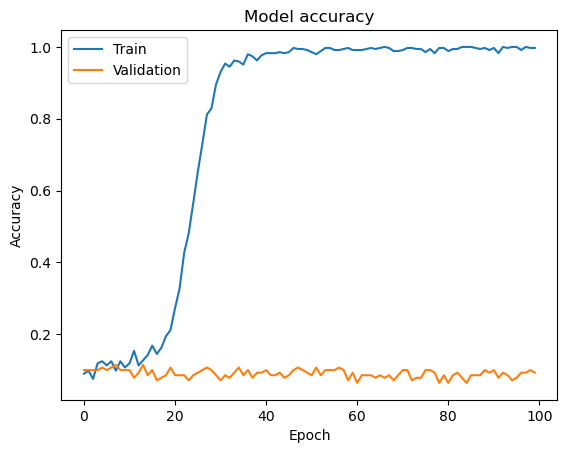

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


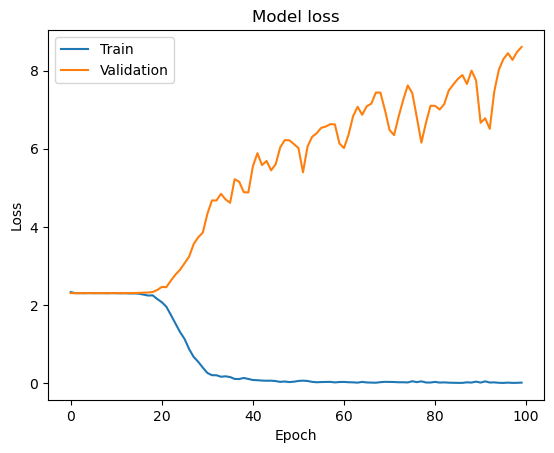

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=300,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/300
11/11 [==============================] - 8s 725ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 7.6548 - val_accuracy: 0.0643
Epoch 2/300
11/11 [==============================] - 3s 230ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 8.1194 - val_accuracy: 0.0714
Epoch 3/300
11/11 [==============================] - 3s 227ms/step - loss: 0.0138 - accuracy: 0.9942 - val_loss: 8.2827 - val_accuracy: 0.0643
Epoch 4/300
16/16 [==============================] - 1s 72ms/step - loss: 2.2097 - accuracy: 0.7299
Test accuracy: 0.7298969030380249
